### SafetyPointPush1-v0

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')
show = True

runs = ['PPO-lag','SIM','dynamic-SIM']
save_path = './figures/SafetyPointPush1-v0'
constraint = 18
step_size = 50000

run_dirs = {
    'dynamic-SIM'      :'.\log_data\SafetyPointPush1-v0\dynamic-SIM',
    'SIM'      :'.\log_data\SafetyPointPush1-v0\SIM',
    'PPO-lag'      :'.\log_data\SafetyPointPush1-v0\PPO-lag',
}


run_colors = {
    'dynamic-SIM'      :cmap.colors[3],
    'SIM'      :cmap.colors[2],
    'PPO-lag'      :cmap.colors[0],
}

run_labels = {
    'dynamic-SIM'      :'SIM (dynamic)',
    'SIM'      :'SIM',
    'PPO-lag'      :'PPO-lag',
}

line_widths = {
    'dynamic-SIM'      :3,
    'SIM'      :3,
    'PPO-lag'      :3,
}

run_lines = {
    'dynamic-SIM'      :'-',
    'SIM'      :'-',
    'PPO-lag'      :'-',
}

def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr


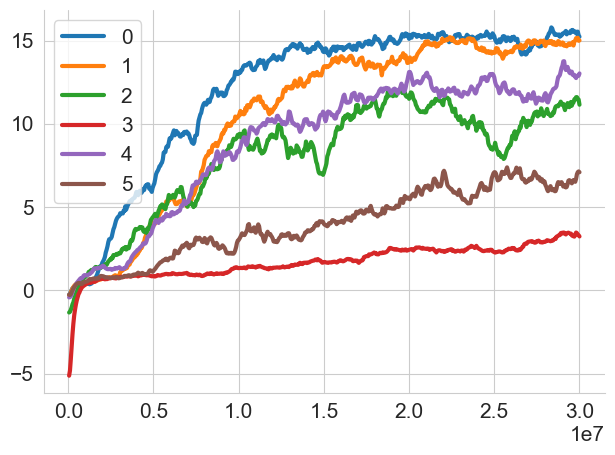

In [10]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 15
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('whitegrid')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

run = 'SIM'
for seed in range(6):
    run_dir = run_dirs[run]
    run_color = cmap.colors[seed]
    run_label = f'{seed}'
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    return_path = os.path.join(run_dir,f'return_{seed}.txt')
    with open(return_path) as f:
        return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

    avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
bottom, top = plt.ylim() # return the current ylim
# plt.ylim((0, 6)) # set the ylim to bottom, top
# plt.ylim(0, 6) # set the ylim to bottom, top
plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'GB_problem_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

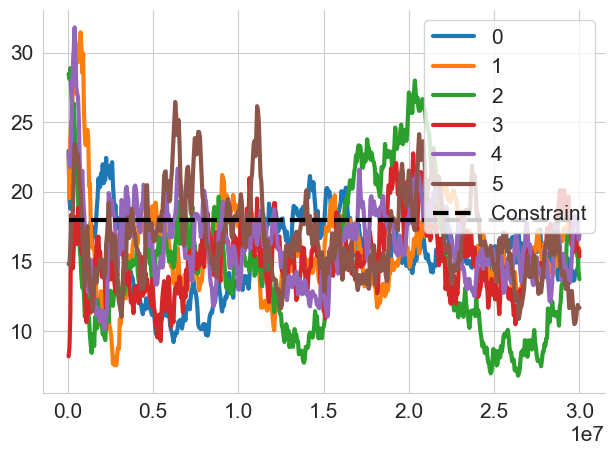

In [11]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 15
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('whitegrid')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

run = 'SIM'
for seed in range(6):
    run_dir = run_dirs[run]
    run_color = cmap.colors[seed]
    run_label = f'{seed}'
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    return_path = os.path.join(run_dir,f'cost_{seed}.txt')
    with open(return_path) as f:
        return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

    avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=3
, label='Constraint')
pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
# bottom, top = plt.ylim() # return the current ylim
# plt.ylim((0, 6)) # set the ylim to bottom, top
# plt.ylim(0, 6) # set the ylim to bottom, top
plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'GB_problem_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

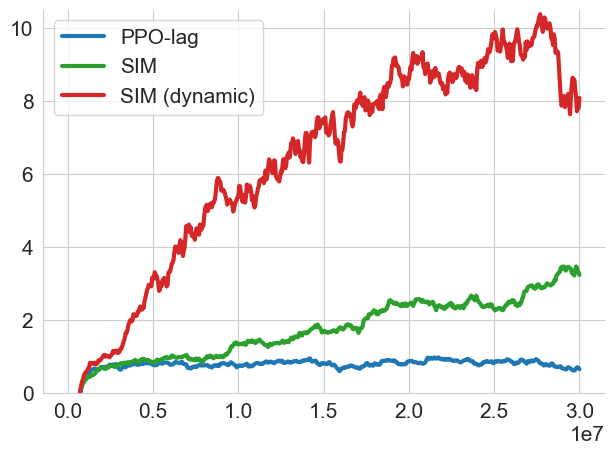

In [12]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 15
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('whitegrid')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    for seed in range(3,4):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.15)
pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 10.5)) # set the ylim to bottom, top
plt.ylim(0, 10.5) # set the ylim to bottom, top
plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'dynamic_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

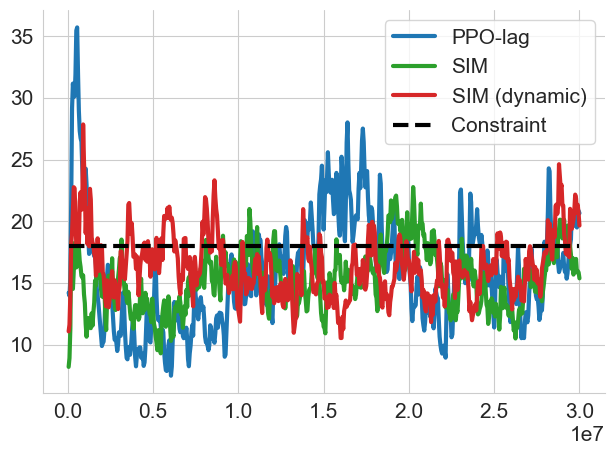

In [13]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 15
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('whitegrid')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []
    for seed in range(3,4):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.15)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=3
, label='Constraint')

# bottom, top = plt.ylim() # return the current ylim
# plt.ylim((0, 50)) # set the ylim to bottom, top
# plt.ylim(0, 50) # set the ylim to bottom, top
plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'dynamic_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')